# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [198]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology
from skimage import filters
from skimage.draw import circle_perimeter 
from skimage import measure


Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

Text(0.5,1,'Eroded image, radius=20')

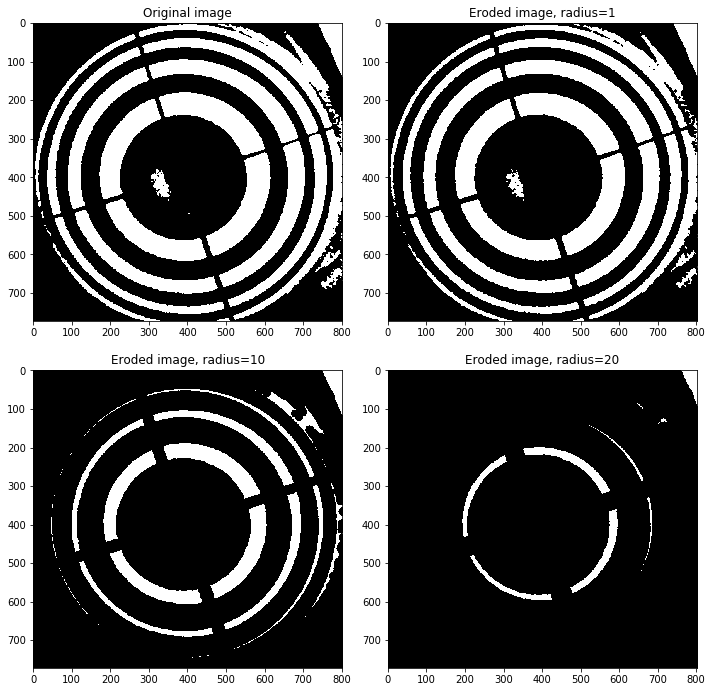

In [199]:
# Import image
filename = './images/FindingContours.png'
image = io.imread(filename)

# Create disks
disk1 = morphology.disk(1)
disk10 = morphology.disk(10)
disk20 = morphology.disk(20)

# Erode image using different disks
eroded_disk1 = morphology.erosion(image, disk1)
eroded_disk10 = morphology.erosion(image, disk10)
eroded_disk20 = morphology.erosion(image, disk20)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(image)
plt.title('Original image')

# Show eroded images
plt.subplot (222)
io.imshow(eroded_disk1)
plt.title ('Eroded image, radius=1')

plt.subplot (223)
io.imshow(eroded_disk10)
plt.title ('Eroded image, radius=10')

plt.subplot (224)
io.imshow(eroded_disk20)
plt.title ('Eroded image, radius=20')

** Q.1.2 Dilation **

Text(0.5,1,'Dilated image, radius=20')

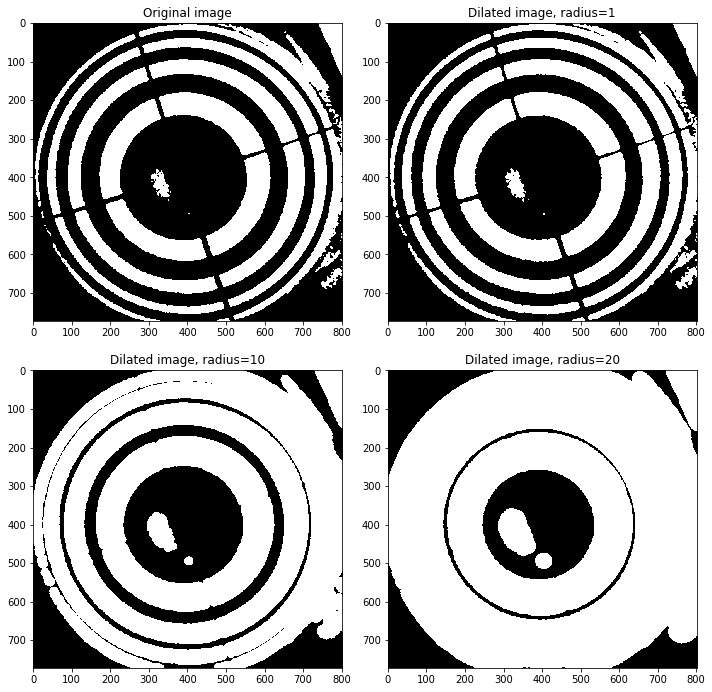

In [200]:
# Dilate image using different disks
dilated_disk1 = morphology.dilation(image, disk1)
dilated_disk10 = morphology.dilation(image, disk10)
dilated_disk20 = morphology.dilation(image, disk20)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(image)
plt.title('Original image')

# Show dilated images
plt.subplot (222)
io.imshow(dilated_disk1)
plt.title ('Dilated image, radius=1')

plt.subplot (223)
io.imshow(dilated_disk10)
plt.title ('Dilated image, radius=10')

plt.subplot (224)
io.imshow(dilated_disk20)
plt.title ('Dilated image, radius=20')

** Q.1.3 Opening **

Text(0.5,1,'Opened image, radius=20')

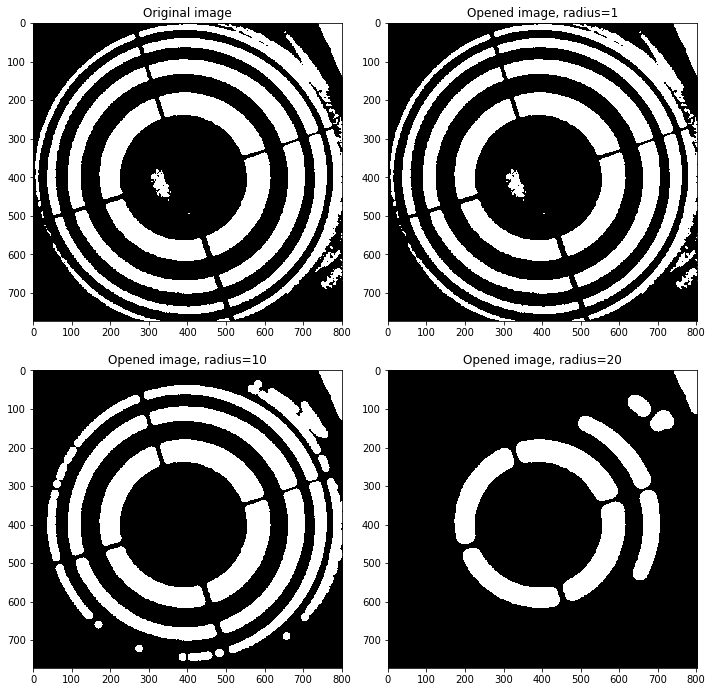

In [201]:
# Open image using different disks
opened_disk1 = morphology.opening(image, disk1)
opened_disk10 = morphology.opening(image, disk10)
opened_disk20 = morphology.opening(image, disk20)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(image)
plt.title('Original image')

# Show opened images
plt.subplot (222)
io.imshow(opened_disk1)
plt.title ('Opened image, radius=1')

plt.subplot (223)
io.imshow(opened_disk10)
plt.title ('Opened image, radius=10')

plt.subplot (224)
io.imshow(opened_disk20)
plt.title ('Opened image, radius=20')

** Q.1.4 Closing**

Text(0.5,1,'Closed image, radius=20')

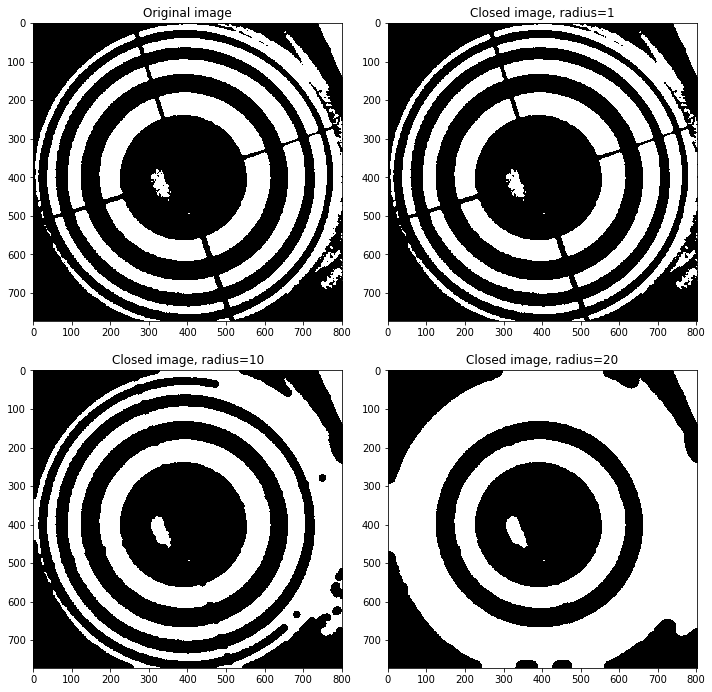

In [202]:
# Close image using different disks
closed_disk1 = morphology.closing(image, disk1)
closed_disk10 = morphology.closing(image, disk10)
closed_disk20 = morphology.closing(image, disk20)

# Display the images
fig = plt.figure(figsize=(10,10))

# Show original image
plt.subplot (221)
io.imshow(image)
plt.title('Original image')

# Show opened images
plt.subplot (222)
io.imshow(closed_disk1)
plt.title ('Closed image, radius=1')

plt.subplot (223)
io.imshow(closed_disk10)
plt.title ('Closed image, radius=10')

plt.subplot (224)
io.imshow(closed_disk20)
plt.title ('Closed image, radius=20')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

**Erosion:** shrinks bright regions and enlarges the dark ones.

**Dilation:** enlarges bright regions and shrinks the dark ones.

**Opening:** is defined as an erosion followed by dilation which tends to open up dark gaps between bright features.

**Closing:** consists in a dilation followed by an erosion which closes up dark gaps between bright features.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

C:\Users\dono_\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\dono_\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


Text(0.5,1,'Coins image')

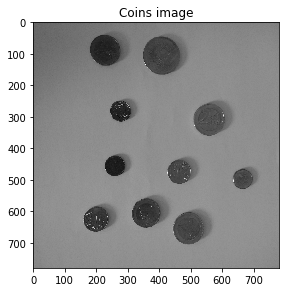

In [203]:
# Import image as ubyte, grey scale
filename = './images/coins.jpg'
coins_im = rescale(io.imread(filename, as_grey=True), .25)
coins_im = img_as_ubyte(coins_im)

# Display image
io.imshow(coins_im)
plt.title('Coins image')

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

Text(0.5,1,'Thresholded coins image')

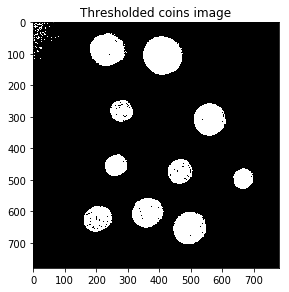

In [204]:
# Find threshold 
threshold = filters.threshold_otsu(coins_im)

# Create thresholded image
coins_thresh = coins_im <= threshold

# Display image
io.imshow(coins_thresh)
plt.title('Thresholded coins image')


**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

Text(0.5,1,'Cleaned coins image')

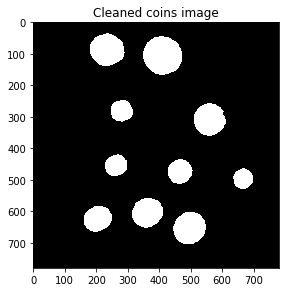

In [205]:
# Close image using different disks
clean_coins = morphology.opening(coins_thresh, disk1)
clean_coins = morphology.erosion(clean_coins, disk1)
clean_coins = morphology.erosion(clean_coins, disk1)
clean_coins = morphology.dilation(clean_coins, disk1)
clean_coins = morphology.dilation(clean_coins, disk1)
clean_coins = morphology.closing(clean_coins, disk10)

# Display image
io.imshow(clean_coins)
plt.title('Cleaned coins image')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


C:\Users\dono_\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


Number of regions= 11
Radius of region = 53
Area of region = 8918
Radius of region = 62
Area of region = 12027
Radius of region = 35
Area of region = 3919
Radius of region = 51
Area of region = 8236
Radius of region = 35
Area of region = 3860
Radius of region = 39
Area of region = 4892
Radius of region = 32
Area of region = 3259
Radius of region = 48
Area of region = 7386
Radius of region = 43
Area of region = 5795
Radius of region = 51
Area of region = 8415


Text(0.5,1,'Circles on the image')

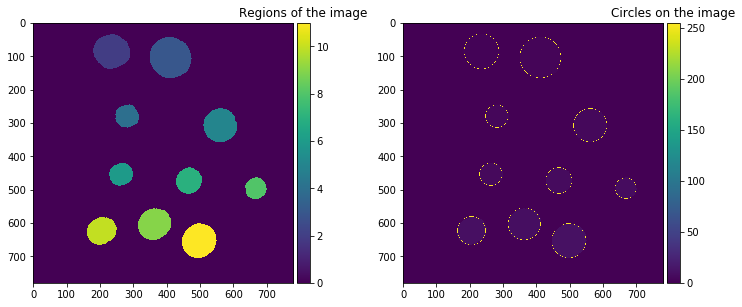

In [206]:
img_label = measure.label(closed_coins)
regions = measure.regionprops(img_label)

# Display the image with the different labels
fig = plt.figure(figsize=(10,10))
plt.subplot (121)
io.imshow(img_label)
plt.title('Regions of the image')

# Display the number of regions
print('Number of regions= {}'.format(len(regions)))

# Display the radius of each region 
for idx_region, region in enumerate (regions):
    if idx_region == 0:
        continue
    radius = region.equivalent_diameter / 2.
    print('Radius of region = {:.0f}'.format(radius))
    print('Area of region = {:.0f}'.format(region.convex_area))
    circle_coord = circle_perimeter(int(region.centroid[0]), int(region.centroid[1]), int(radius))
    img_label[circle_coord[0], circle_coord[1]] = 255

# Display the cirlces
plt.subplot(122)
io.imshow(img_label)
plt.title('Circles on the image')


### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

Text(0.5,1,'Objects image')

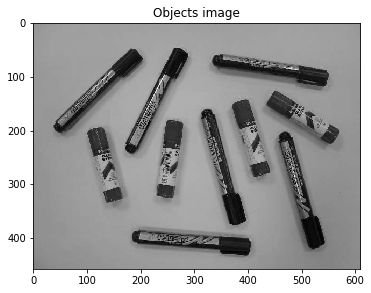

In [207]:
# Open the image
filename = './images/objets4.jpg'
objects_im = io.imread(filename, as_grey=True)

# Display image
io.imshow(objects_im)
plt.title('Objects image')

0.382993717831


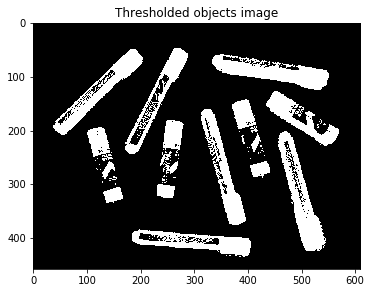

In [208]:
# Find threshold 
threshold = filters.threshold_otsu(objects_im)

# Create thresholded image
objects_thresh = objects_im < 1.155*threshold # Factor added to improve region separation

# Display image
io.imshow(objects_thresh)
plt.title('Thresholded objects image')
print(threshold)

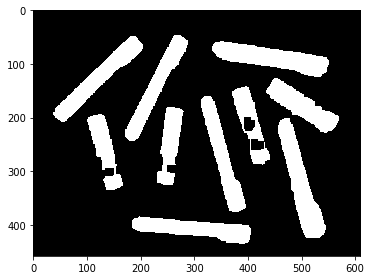

In [210]:
# Since the shape of the objects is closer to rectangles a squared mask for morphological
# operations is chosen
mask = (1./(10.*10.))*np.ones((10,10))
mask1 = (1./(7.*7.))*np.ones((7,7))

# Apply morphological operations to clean the objects
clean_objects = morphology.dilation(objects_thresh, mask1)
clean_objects = morphology.erosion(clean_objects, mask1)
clean_objects = morphology.dilation(clean_objects, mask1)
clean_objects = morphology.closing(clean_objects, mask1)
clean_objects = morphology.erosion(clean_objects, mask1)
clean_objects = morphology.closing(clean_objects, mask)

# Display clean image
io.imshow(clean_objects)

C:\Users\dono_\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


Number of regions= 10


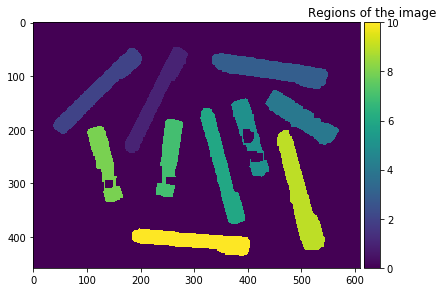

In [211]:
# Obtain the different regions in the image
img_label = measure.label(clean_objects)
regions = measure.regionprops(img_label)

# Display the image with the different labels
io.imshow(img_label)
plt.title('Regions of the image')

# Display the number of regions
print('Number of regions= {}'.format(len(regions)))


In [212]:
# Count the different objects in the image 
markers = 0 # number of markers in the image
glue = 0 # number of glue sticks in the image

for idx_region, region in enumerate (regions):
    major_axis = region.major_axis_length
    print('Length of object = {:.0f}'.format(major_axis))
    
    # To classify objects a threshold is set based on the length of the major axis
    if major_axis > 200:
        markers = markers + 1
    else:
        glue = glue + 1
        
print('The number of markers in the image is = {}'.format(markers))
print('The number of glue sticks in the image is = {}'.format(glue))

Length of object = 251
Length of object = 245
Length of object = 247
Length of object = 165
Length of object = 180
Length of object = 259
Length of object = 168
Length of object = 167
Length of object = 261
Length of object = 257
The number of markers in the image is = 6
The number of glue sticks in the image is = 4
